### Loading the Generator
This notebook will outline the process of loading a trained generator. We will start by copying the architecture of the generator from our main training notebook. We will then update the model's states using the state dictionary that can be downloaded at the end of training.

In [2]:
# importing
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
# Creating the generator class
class G_arch_instance(nn.Module):
  def __init__(self, in_channels, out_channels,  kernel_size=4, stride=2,
                 padding=1, **kwargs):
    super(G_arch_instance, self).__init__(**kwargs)

    # The first layer takes a tensor of 100 channels(initialized during training) and outputs
    # 2048 channels(64*32 decreased from 64*64 because of computational limitations). The second to sixth layer
    # mostly decrease the output channels gradually for optimal learning. These, along with the initial output
    # could be increased(more neurons) for better and more detail oriented learning.

    self.gen = nn.Sequential( # Using nn.Sequential for readability.
        nn.ConvTranspose2d(in_channels=in_channels, out_channels=2048, kernel_size=kernel_size, stride=stride, padding=padding),
        nn.BatchNorm2d(2048),
        nn.ReLU(),

        nn.ConvTranspose2d(in_channels=2048, out_channels=2048, kernel_size=kernel_size, stride=stride, padding=padding),
        nn.BatchNorm2d(2048),
        nn.ReLU(),

        nn.ConvTranspose2d(in_channels=2048, out_channels=1024, kernel_size=kernel_size, stride=stride, padding=padding),
        nn.BatchNorm2d(1024),
        nn.ReLU(),

        nn.ConvTranspose2d(in_channels=1024, out_channels=512, kernel_size=kernel_size, stride=stride, padding=padding),
        nn.BatchNorm2d(512),
        nn.ReLU(),

        nn.ConvTranspose2d(in_channels=512, out_channels=256, kernel_size=kernel_size, stride=stride, padding=padding),
        nn.BatchNorm2d(256),
        nn.ReLU(),

        nn.ConvTranspose2d(in_channels=256, out_channels=128, kernel_size=kernel_size, stride=stride, padding=padding),
        nn.BatchNorm2d(128),
        nn.ReLU(),

        nn.ConvTranspose2d(in_channels=128, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding),
        nn.Tanh()
        )

  def forward(self, inp):
    return self.gen(inp)

G_arch = G_arch_instance(in_channels=100, out_channels=3)

In [4]:
# The model parameters could be updated using the state dictionary(file path will be different on your local machine).
gen_path = '/content/G_arch (1).pth' # path to uploaded state dictionary.

!ls -lh {gen_path}  # Checking file size and permissions.
#!unzip -t {gen_path} # Uncomment this line if file unzipping needed.

G_arch.load_state_dict(torch.load(gen_path)) # Loading the state dictionary.
G_arch.eval() # Setting evaluation mode.

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `ls -lh /content/G_arch (1).pth  # Checking file size and permissions.'


G_arch_instance(
  (gen): Sequential(
    (0): ConvTranspose2d(100, 2048, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): ConvTranspose2d(2048, 2048, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): ConvTranspose2d(2048, 1024, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (

torch.Size([1, 128, 128, 3])


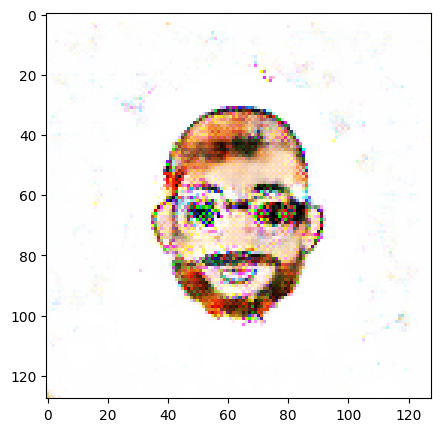

In [14]:
# We can see the generator in action by feeding it random data. Will be running this on cpu.

Z = torch.normal(0, 1, size=(1, 100, 1, 1), device='cpu')
fake_x = G_arch(Z).permute(0, 2, 3, 1) / 2 + 0.5 # getting the image and rearranging the dimensions/modifying vals.
print(fake_x.shape) # Checking shape to confirm batch size, image resolution, and channels.
plt.figure(figsize=(5,5))
plt.imshow(fake_x[0].cpu().detach().numpy()) # Showing the image.

This model was trained on the A100 gpu for a limited number of epochs(over 3.5 hours). Despite that, the outputs are great as small features like the nose and mouth of the toons are visible. Higher input image resolutions, bigger batch sizes, more model neurons, and greater number of epochs could potentially lead to even better results, however greater computation and/or wait times would be needed.